In [8]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

from visualization.utils import plot_correlation_matrix, plot_scatterplot_matrix

init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
plt.rcParams ['figure.figsize'] = (13,8)
sns.set()
%config InlineBackend.figure_format = 'retina'

In [16]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
numerical = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
df['big_bedrm'] = df['AveBedrms'] > 1
df = df[numerical + ['big_bedrm']]
df.head()

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude  big_bedrm
0  8.3252      41.0  6.984127  2.555556     37.88    -122.23       True
1  8.3014      21.0  6.238137  2.109842     37.86    -122.22      False
2  7.2574      52.0  8.288136  2.802260     37.85    -122.24       True
3  5.6431      52.0  5.817352  2.547945     37.85    -122.25       True
4  3.8462      52.0  6.281853  2.181467     37.85    -122.25       True

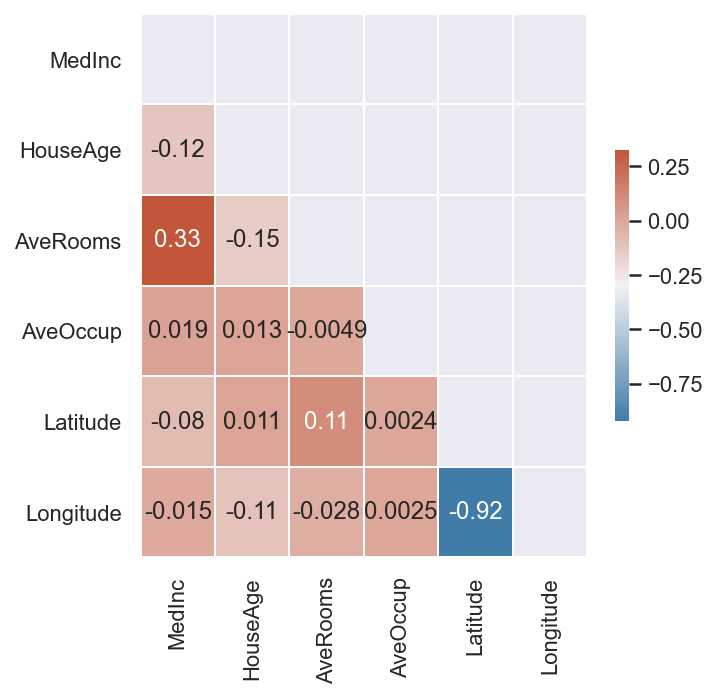

In [17]:
plot_correlation_matrix(df[numerical].corr(), size=(5, 5))

In [18]:
plot_scatterplot_matrix(df[numerical])

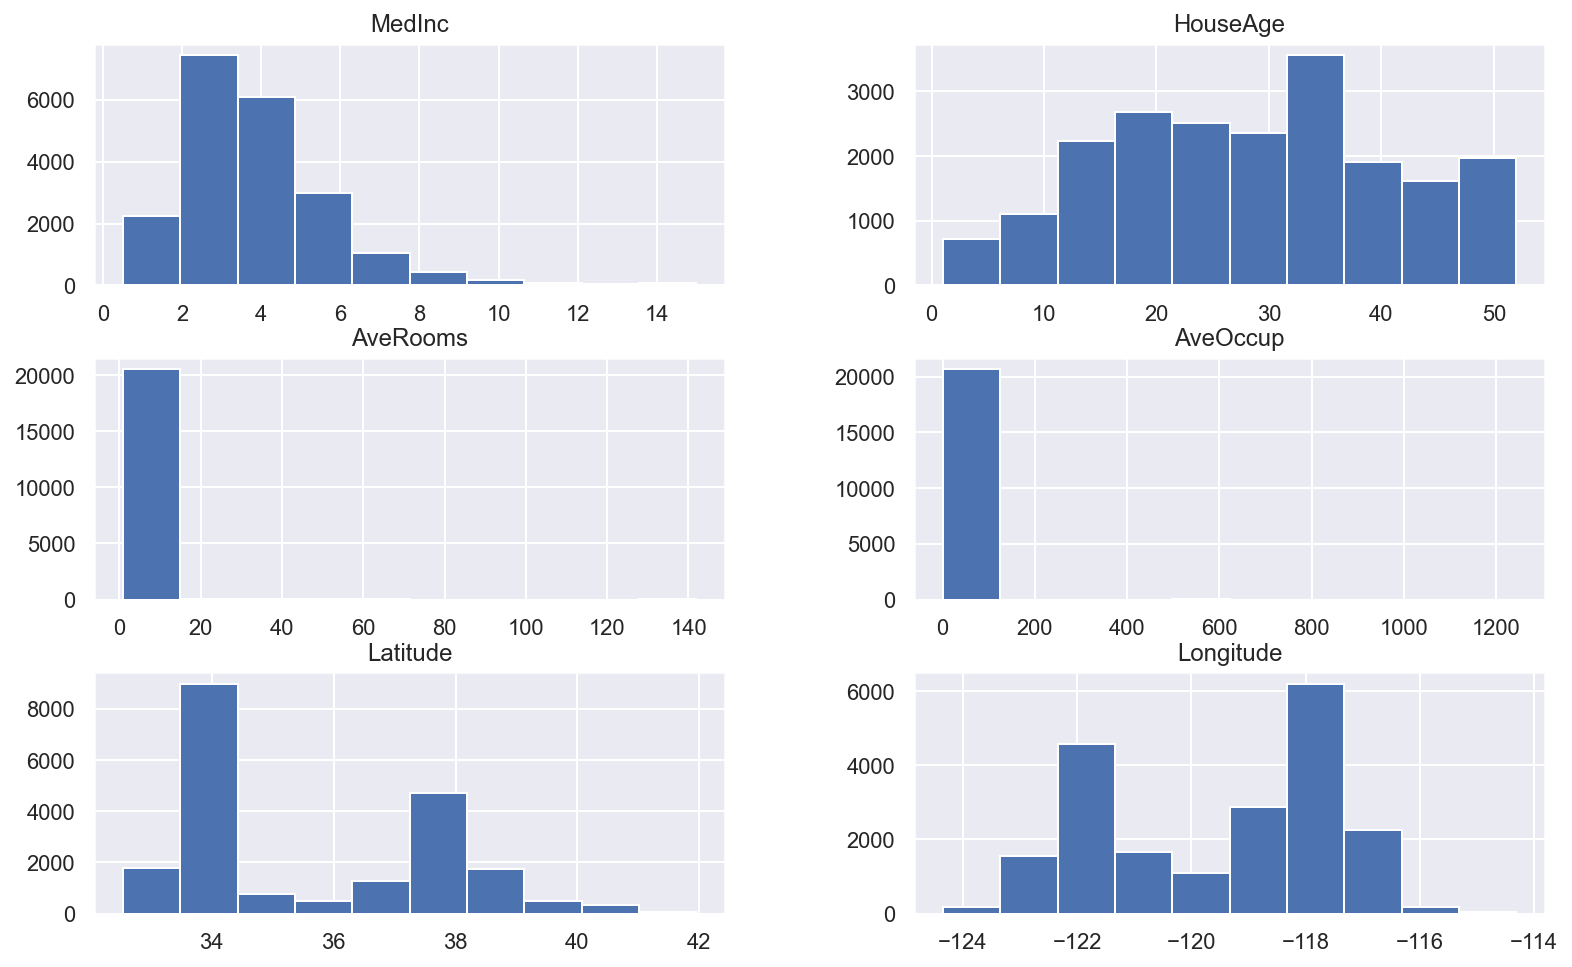

In [19]:
df[numerical].hist()
plt.show()

In [20]:
data = []
for bedrm in df.big_bedrm.unique():
    data.append(
        go.Box(y=df[df.big_bedrm == bedrm].MedInc, name=str(bedrm))
    )

iplot(data, show_link=False)